# Inspect the bike rider count data

For the raw bike rider counts data, a detailed description of the dataset is missing. Therefore, we investigate what the rows and columns represent.

The results of this inspection are summarized at the end of this notebook.

## Data Import

Import the raw bike rider counts data.

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
from datetime import timedelta, date

In [2]:
# paths to data (one file per month)
dat_paths = ['./../data/raw/eco_counter_fahrradzaehler_20210' + str(i) + '.csv' for i in range(1,10)]
dat_paths = dat_paths + ['./../data/raw/eco_counter_fahrradzaehler_2021' + str(i) + '.csv' for i in range(10,13)]

# read in the data
dats = [pd.read_csv(path) for path in dat_paths]

# concatenate monthly data to get data of whole year in one dataframe
dat = pd.concat(dats)

In [3]:
# check whether import of data worked
dat.head()

,timestamp,iso_timestamp,zählstand,stand,standort,channel_name,channel_id,counter_site,counter_site_id,domain_name,domain_id,longitude,latitude,timezone,interval,counter_serial
0,2021-01-01T01:00:00+0000,2021-01-01T01:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
1,2021-01-01T02:00:00+0000,2021-01-01T02:00:00+0100,0,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
2,2021-01-01T03:00:00+0000,2021-01-01T03:00:00+0100,1,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
3,2021-01-01T04:00:00+0000,2021-01-01T04:00:00+0100,1,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496
4,2021-01-01T05:00:00+0000,2021-01-01T05:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.40913,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496


## Data Inspection

One row in the raw data represents one hourly bike rider count measurement.  
Each column represents an attribute of a measurement. Find out what these attributes are and what values they take:

In [4]:
# initialize dataframe that yields an overview of the data contained in 'dat'
overview_df = pd.DataFrame(columns=['colname', 'number_of_unique_values_in_column', 'example_values'])

# For each column in the dataframe 'dat', determine the number of unique values
# that the column contains, and draw (maximum) 4 example values from each column
# to illustrate which values occur in the column.
for colname in dat.columns:

    # unique values in column
    unique_values = list(set(dat[colname]))

    # pick maximum 4 values from unique-values-set (as examples)
    example_values = random.sample(unique_values, k=min(4, len(unique_values)))

    # add information about the currently considered column to the overview dataframe
    new_row = pd.DataFrame.from_dict(
        {'colname' : colname,
        'number_of_unique_values_in_column' : len(unique_values),
        'example_values' : example_values
        }, orient='index').T
    overview_df = pd.concat([overview_df, new_row], ignore_index = True)

with pd.option_context('max_colwidth', 800):
    display(overview_df)

,colname,number_of_unique_values_in_column,example_values
0,timestamp,8748,"[2021-07-06T01:00:00+0000, 2021-05-27T04:00:00+0000, 2021-02-05T17:00:00+0000, 2021-10-09T15:00:00+0000]"
1,iso_timestamp,8748,"[2021-07-16T00:00:00+0200, 2021-09-04T15:00:00+0200, 2021-02-09T08:00:00+0100, 2021-05-11T06:00:00+0200]"
2,zählstand,696,"[311, 360, 359, 506]"
3,stand,2,"[4, 0]"
4,standort,6,"[Stadt Konstanz, Stadt Ludwisburg, Stadt Offenburg, Stadt Heidelberg]"
5,channel_name,73,"[Blautal Lupferbrücke Ri. Süden, Zugwiesen Stadtauswärts, Schlossstraße Stadtauswärts B, Blautal Lupferbrücke Ri. Stadt]"
6,channel_id,101,"[353262797, 353221311, 353221137, 353221150]"
7,counter_site,25,"[S-Bahn Haltestelle Fürstenberg, Hauptstraße neu, Friedrich-Ebert-Straße, Plöck]"
8,counter_site_id,25,"[300015458, 100017109, 300015618, 300014866]"
9,domain_name,1,[NVBW - Nahverkehrsgesellschaft Baden- Württemberg]


Quick observations from this overview and dat.head() above:  

- Data was collected hourly: 'zählstand' represents the bike riders passing a counting station within 1 hour.
- Data was collected in 6 cities (see: the number of unique values in column 'standort' is 6), at 25 counter sites (see: the number of unique values in column 'counter_site' is 25) in total.
- 'channel_name' probably specifies different channels (count series) at one counting station, e.g., by naming the direction of travel.

### Inspect timestamp of measurements

In [5]:
# make 'timestamp' date
dat['timestamp'] = pd.to_datetime(dat['timestamp'])

In [6]:
# check whether there are measurements taken at midnight
example_midnight_dates = [pd.Timestamp('2021-03-0' + str(i)+ 'T00', tz='UTC') for i in np.arange(1,10)]
if(len(dat[dat['timestamp'].isin(example_midnight_dates)]) > 0):
    print('There are measurements taken at midnight.')

There are measurements taken at midnight.


Some measurements are collected at midnight. We have to correct the date for those measurements because they reflect bikers that passed the counting station in the hour before midnight, i.e., on the "day before".

In [7]:
# For each measurement (row), we want to know on which day the data was 
# collected. In order to adjust for counts collected at midnight, we shift the 
# daytime by 1 second before converting it to date.
# (Thereby, we can simply compute daily sums in the cell below;
#  adding "midnight counts" to the day before by shifting the daytime by 1 sec.)
dat['date'] = (dat['timestamp'] - pd.Timedelta(1, 'sec')).dt.date

### Inspect nesting of location information

'standort' --> 'counter_site'/'counter_site_id'/'counter_serial'/'latitude'+'longitude' --> 'channel_name'/'channel_id'

In the following, we check whether the location data is really nested as the quick observations above suggest, namely:  
There are different 'standort' (cities).  
Within each of 'standort' (city), there are different 'counter_site' (e.g., different streets).  
And at each 'counter_site', different count series (so-called "channels") are measured in parallel, e.g., in different directions of travel. 'channel_name' / 'channel_id' discriminates between these different channels.  
NOTE: As we will see below, 'channel_name' provides a distinction between channels that is more coarse than the distinction made by 'channel_id'; i.e., 'channel_id' is nested within 'channel_name'.

#### 'standort'

In [8]:
cities = list(set(dat['standort']))
print('The dataset contains bike rider counts for the following cities:', cities)

The dataset contains bike rider counts for the following cities: ['Stadt Ulm', 'Stadt Konstanz', 'Stadt Freiburg', 'Stadt Ludwisburg', 'Stadt Heidelberg', 'Stadt Offenburg']


#### 'counter_site'/'counter_site_id'/'counter_serial'/'latitude'+'longitude'

In [9]:
# overview over counter sites
dat.groupby(['standort', 'counter_site'], as_index=False).size()
# size reflects the number of datapoints collected at the counter site

,standort,counter_site,size
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,17496
1,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,8748
2,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,17496
3,Stadt Heidelberg,Bahnstadtpromenade,52488
4,Stadt Heidelberg,Gaisbergstraße,52488
5,Stadt Heidelberg,Hardtstraße,34992
6,Stadt Heidelberg,Mannheimer Straße,43740
7,Stadt Heidelberg,Plöck,52488
8,Stadt Heidelberg,Schlierbacher Landstraße,34992
9,Stadt Heidelberg,Ziegelhäuser Landstraße,34992


In [10]:
# overview over counter sites, adding 'counter_site_id', 'counter_serial', 'latitude'+'longitude' information
dat.groupby(['standort', 'counter_site', 'counter_site_id', 'counter_serial', 'latitude', 'longitude'], as_index=False).size()

,standort,counter_site,counter_site_id,counter_serial,latitude,longitude,size
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,100014585,Y2H18076077,47.990540,7.862301,17496
1,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,100014511,Y2H21070299,47.998592,7.822082,8748
2,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,100017109,Y2H22012076,47.999840,7.837170,17496
3,Stadt Heidelberg,Bahnstadtpromenade,100056770,Y2H19111385,49.397709,8.672679,52488
4,Stadt Heidelberg,Gaisbergstraße,100012608,YTH15078127,49.406723,8.694240,52488
5,Stadt Heidelberg,Hardtstraße,100056769,Y2H19111384,49.388638,8.676693,34992
6,Stadt Heidelberg,Mannheimer Straße,100013034,Y2G14014962,49.411800,8.659140,43740
7,Stadt Heidelberg,Plöck,100012161,Y2H22032496,49.409130,8.698543,52488
8,Stadt Heidelberg,Schlierbacher Landstraße,100049883,Y2H18106691,49.414705,8.718396,34992
9,Stadt Heidelberg,Ziegelhäuser Landstraße,100049901,Y2H18106689,49.419259,8.725964,34992


--> 'counter_site', 'counter_site_id', 'counter_serial', 'latitude' together with 'longitude' provide the same information. They tell us where in the city the counting station is located.

(Since we do not have mappings of 'counter_site_id' or 'counter_serial' to actual locations, we will use the information provided by 'latitude'+'longitude'.)

#### 'channel_name'/'channel_id'

In [11]:
# overview over number of datapoints collected at the channels with given channel names
dat.groupby(['standort', 'counter_site', 'channel_name'], as_index=False).size()

,standort,counter_site,channel_name,size
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,8748
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr. [Bike],8748
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,FR2 Güterbahn / Ferd.-Weiß-Str.,8748
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Norden (Zelt 01_OUT),8748
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,Richtung Süden (Zelt 01_IN),8748
...,...,...,...,...
80,Stadt Ludwisburg,Zugwiesen,Zugwiesen Stadtauswärts,24186
81,Stadt Ludwisburg,Zugwiesen,Zugwiesen Stadteinwärts,24186
82,Stadt Offenburg,Hauptstraße neu,Hauptstraße neu,8748
83,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Stadt,5752


In [12]:
# overview over number of datapoints collected at the channels with given channel ID
dat.groupby(['standort', 'counter_site', 'channel_id'], as_index=False).size()

,standort,counter_site,channel_id,size
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,101014585,8748
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,353234627,8748
2,Stadt Freiburg,FR2 Güterbahn / Ferd.-Weiß-Str.,101014511,8748
3,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,101017109,8748
4,Stadt Freiburg,FR3 Eschholzstr. / Egonstr.,102017109,8748
...,...,...,...,...
96,Stadt Offenburg,Hauptstraße neu,101036542,8748
97,Stadt Ulm,Blautal Lupferbrücke,101057246,2876
98,Stadt Ulm,Blautal Lupferbrücke,102057246,2876
99,Stadt Ulm,Blautal Lupferbrücke,103057246,2876


In [13]:
print('number of unique channel names:', len(list(set(dat['channel_name']))))
print('number of unique channel IDs:', len(list(set(dat['channel_id']))))

number of unique channel names: 73
number of unique channel IDs: 101


--> Since the numbers of unique channel names and unique channel IDs differ, there cannot be a 1-to-1-mapping between 'channel_name' and 'channel_id'. The two columns provide different information.
Since there are more channel IDs than channel names, we assume that channel IDs are nested within channel names. In other words, we assume that at one channel site identified by the channel's name, mutliple count series (channels) are collected (identified by the channel's ID).  
Check this assumption:

In [14]:
# If channel ID is nested within channel name, we should find a unique channel name for each channel ID.
# Check this.

# get all channel IDs
channel_ids = list(set(dat['channel_id']))

# Initialize a list in which we store for each channel ID with how many different
# channel names it occurs together.
list_of_num_channel_names_for_id = []

# For each channel ID, check with how many different channel names it occurs 
# together.
for id in channel_ids:

    # extract data for channel id
    dat_id = dat[dat['channel_id'] == id]

    # check number of channel names for each id,
    # should be 1 if mapping from id to channel_name was unique
    num_channel_names_for_id = len(set(dat_id['channel_name']))

    list_of_num_channel_names_for_id.append(num_channel_names_for_id)

print('A single channel ID occurs with up to', max(np.unique(list_of_num_channel_names_for_id)), 'channel names together.')

A single channel ID occurs with up to 2 channel names together.


--> There are channel IDs that occur together with two distinct channel names.

In [15]:
# find channel IDs which occur together with two distinct channel names

# indices of channel IDs that occur with 2 channel names
cID_indices = [i for i, e in enumerate(list_of_num_channel_names_for_id) if e == 2]
print('Number of channel IDs that occur together with two channel names:', len(cID_indices))

channel_ids_with_two_channel_names = [channel_ids[e] for i, e in enumerate(cID_indices)]
print('Channel IDs that occur together with two channel names:', channel_ids_with_two_channel_names)

Number of channel IDs that occur together with two channel names: 4
Channel IDs that occur together with two channel names: [353239372, 353239373, 353239374, 353239375]


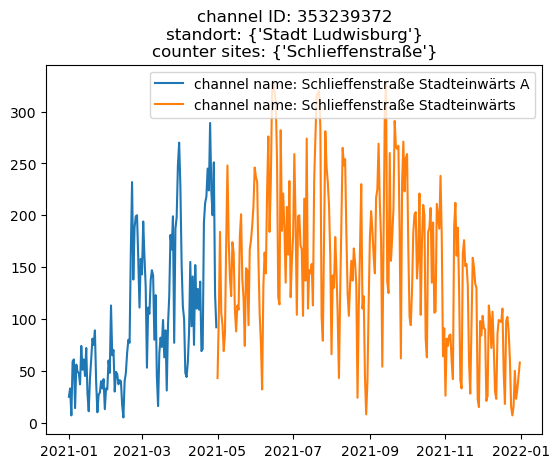

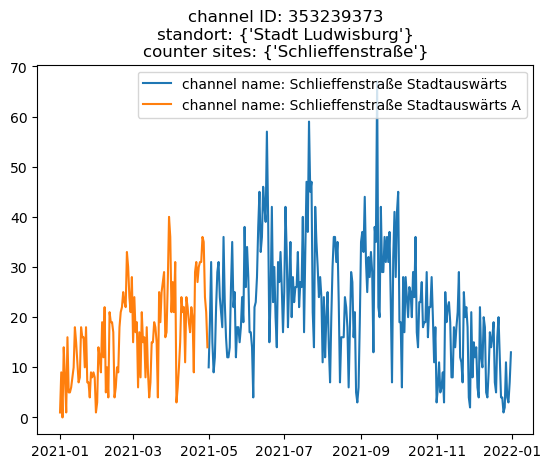

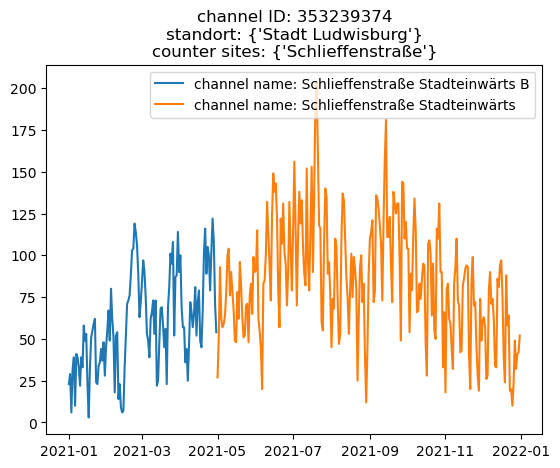

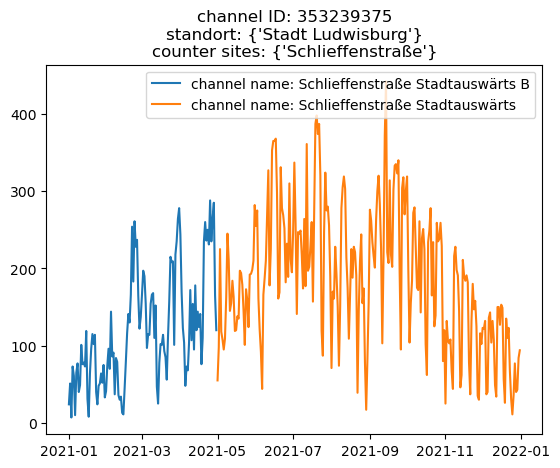

In [16]:
# sum counts of one day at one counting station
counters_by_daytype_daily = dat.groupby(by=['standort', 'counter_site', 'channel_name', 'channel_id', 'longitude', 'latitude', 'date'], as_index=False)['zählstand'].sum()

# for each channel ID that occurs together with two distinct channel names
for id in channel_ids_with_two_channel_names:

    # channel names with which the given channel ID occurs together
    channel_names_for_id = list(set(dat[dat['channel_id'] == id]['channel_name']))
    counter_sites_for_id = list(set(dat[dat['channel_id'] == id]['counter_site']))
    standorts_for_id = list(set(dat[dat['channel_id'] == id]['standort']))

    # extract data of this channel
    dat_for_id = counters_by_daytype_daily[counters_by_daytype_daily['channel_id'] == id]
    
    # plot daily bike rider counts collected by channel with given ID,
    # seperate between different 'channel_name'-values

    # initialize figure
    plt.figure()
    
    # for each value of 'channel_name', plot daily number of bike rider counts
    for channel_name_for_id in channel_names_for_id:
        plt.plot(
            dat_for_id[dat_for_id['channel_name'] == channel_name_for_id]['date'],
            dat_for_id[dat_for_id['channel_name'] == channel_name_for_id]['zählstand'],
            label='channel name: ' + channel_name_for_id)
    
    # add title and legend
    plt.title('channel ID: ' + str(id) + '\nstandort: ' + str(set(dat_for_id['standort'])) + '\ncounter sites: ' + str(set(dat_for_id['counter_site'])))
    plt.legend()

Apparently, the channels ('Schlieffenstraße Stadteinwärts', 'Schlieffenstraße Stadtauswärts') were renamed at the beginning of May in 2021 (whereas their ID was not changed).

In [17]:
# find date at which renaming happened

# for each channel ID that occurs together with two distinct channel names,
# print the channel ID and channel name together and check when data was collected
for id in channel_ids_with_two_channel_names:

    channel_names_for_id = list(set(dat[dat['channel_id'] == id]['channel_name']))
    counter_sites_for_id = list(set(dat[dat['channel_id'] == id]['counter_site']))
    standorts_for_id = list(set(dat[dat['channel_id'] == id]['standort']))

    # print
    print('channel ID:', id, '| standort:', standorts_for_id, '| counter_sites:', counter_sites_for_id, '| channel names:', channel_names_for_id)
    
    # check length and dates for data of channel with given channel_id and channel_name
    for channel_name_for_id in channel_names_for_id:
        dat_id_channelname = dat[(dat.standort == standorts_for_id[0]) & (dat.counter_site == counter_sites_for_id[0]) & (dat.channel_id == id) & (dat.channel_name == channel_name_for_id)]
        print('\tdataset for channel_name', channel_name_for_id, '\t: length of dataset: \t', len(dat_id_channelname), '\t min date:', min(dat_id_channelname['timestamp']), '\t max date:', max(dat_id_channelname['timestamp']))

channel ID: 353239372 | standort: ['Stadt Ludwisburg'] | counter_sites: ['Schlieffenstraße'] | channel names: ['Schlieffenstraße Stadteinwärts A', 'Schlieffenstraße Stadteinwärts']
	dataset for channel_name Schlieffenstraße Stadteinwärts A 	: length of dataset: 	 2876 	 min date: 2021-01-01 01:00:00+00:00 	 max date: 2021-04-30 23:00:00+00:00
	dataset for channel_name Schlieffenstraße Stadteinwärts 	: length of dataset: 	 5872 	 min date: 2021-05-01 01:00:00+00:00 	 max date: 2021-12-31 23:00:00+00:00
channel ID: 353239373 | standort: ['Stadt Ludwisburg'] | counter_sites: ['Schlieffenstraße'] | channel names: ['Schlieffenstraße Stadtauswärts', 'Schlieffenstraße Stadtauswärts A']
	dataset for channel_name Schlieffenstraße Stadtauswärts 	: length of dataset: 	 5872 	 min date: 2021-05-01 01:00:00+00:00 	 max date: 2021-12-31 23:00:00+00:00
	dataset for channel_name Schlieffenstraße Stadtauswärts A 	: length of dataset: 	 2876 	 min date: 2021-01-01 01:00:00+00:00 	 max date: 2021-04-30 2

--> Channels were renamed on the month change from April to May in 2021.

If we correct for this renaming, location data is nested: channel IDs are nested withing channel names.

### Example for the nesting of location data

In [18]:
# number of hourly measurements collected at different counting stations in Ludwigsburg
dat[dat['standort'] == 'Stadt Ludwisburg'].groupby(by=['counter_site', 'channel_name', 'channel_id']).size()

counter_site                      channel_name                                    channel_id
Alleenstraße                      Alleenstraße Stadtauswärts A                    102041999     8748
                                  Alleenstraße Stadtauswärts B                    104041999     8748
                                  Alleenstraße Stadtauswärts C                    106041999     8748
                                  Alleenstraße Stadteinwärts A                    101041999     8748
                                  Alleenstraße Stadteinwärts B                    103041999     8748
                                  Alleenstraße Stadteinwärts C                    105041999     8748
Bismarckstraße                    Bismarckstraße Stadtauswärts                    353255195     7803
                                                                                  353255197     7803
                                                                                  353255199     780

In [19]:
# to illustrate: zoom in on data at counter_site 'Fuchshof'
# number of hourly measurements collected at different combinations of channel_name x channel_id
dat[dat['counter_site'] == 'Fuchshof'].groupby(by=['channel_name', 'channel_id']).size()

channel_name            channel_id
Fuchshof stadtauswärts  353245993     8748
                        353245995     8748
Fuchshof stadteinwärts  353245992     8748
                        353245994     8748
dtype: int64

Example:

In Ludwigsburg, there is a counter site called "Fuchshof". At this counter site, we have two channel names ('Fuchshof stadteinwärts' und 'Fuchshof stadtauswärts').
For each of the two channel names, there are two channel IDs ('Fuchshof stadteinwärts': 353245992 and 353245994; 'Fuchshof stadtauswärts': 353245993 and 353245995) which collect hourly data.

So: Once every hour at the counter site 'Fuchshof', two values are collected for bike riders going downtown, and two values are collected for bike riders going out of town.

### Check whether bike rider counts are given hourly

In [20]:
# number of measurements that we are given per day at one counting station
measurements_per_day = dat.groupby(by=['standort', 'counter_site', 'channel_name', 'channel_id', 'longitude', 'latitude', 'date'], as_index=False).size()
measurements_per_day.rename(columns = {'size':'measurements_per_day'}, inplace = True)
measurements_per_day

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,measurements_per_day
0,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-01,24
1,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-02,24
2,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-03,24
3,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-04,24
4,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-05,24
...,...,...,...,...,...,...,...,...
33870,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-26,24
33871,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-27,24
33872,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-28,24
33873,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-04-29,24


In [21]:
# summarize the data from above by showing for how many days (over all counting
# stations) x measurements per day are available
number_of_days_with_x_measurements_per_day = measurements_per_day.groupby(by=['measurements_per_day'], as_index=False).size()
number_of_days_with_x_measurements_per_day.rename(columns = {'size':'number_of_days_with_x_measurements_per_day'}, inplace = True)
number_of_days_with_x_measurements_per_day

,measurements_per_day,number_of_days_with_x_measurements_per_day
0,1,10
1,10,16
2,14,8
3,23,1134
4,24,32707


--> For most days, 24 hourly measurements (bike rider counts) are available. BUT: There are also days for which not 24 single 'hourly' bike rider counts are collected.

#### Check days with less than 24 hourly measurements

Check days for which only 23 'hourly' bike rider counts were collected and investigate why measurements are missing on these days.

In [22]:
# list days per counting station for which only 23 'hourly' measurements are available
measurements_per_day[measurements_per_day['measurements_per_day'] == 23]

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,measurements_per_day
30,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-01-31,23
58,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-02-28,23
89,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-03-31,23
119,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-04-30,23
150,Stadt Freiburg,FR1 Dreisam / Otto-Wels-Str.,FR1 Dreisam / Hindenburgstr.,101014585,7.862301,47.99054,2021-05-31,23
...,...,...,...,...,...,...,...,...
33754,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,102057246,9.957680,48.40080,2021-04-30,23
33785,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-01-31,23
33813,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-02-28,23
33844,Stadt Ulm,Blautal Lupferbrücke,Blautal Lupferbrücke Ri. Süden,104057246,9.957680,48.40080,2021-03-31,23


The dates at which only 23 'hourly' bike rider counts were collected seem to be the end of the month.
Inspect the first 'hourly' measurement of the next month - this measurement at midnight reflects the bike rider count of the last hour of the month before.

In [23]:
# first day of month, midnight.
first_day_of_month_dates_midnight = [pd.Timestamp('2021-0' + str(i)+ '-01T00', tz='UTC') for i in np.arange(1,10)]
dat[dat['timestamp'].isin(first_day_of_month_dates_midnight)]

,timestamp,iso_timestamp,zählstand,stand,standort,channel_name,channel_id,counter_site,counter_site_id,domain_name,domain_id,longitude,latitude,timezone,interval,counter_serial,date


In [24]:
# first day of month, 1 am.
first_day_of_month_dates_1am = [pd.Timestamp('2021-0' + str(i)+ '-01T01', tz='UTC') for i in np.arange(1,10)]
dat[dat['timestamp'].isin(first_day_of_month_dates_1am)]

,timestamp,iso_timestamp,zählstand,stand,standort,channel_name,channel_id,counter_site,counter_site_id,domain_name,domain_id,longitude,latitude,timezone,interval,counter_serial,date
0,2021-01-01 01:00:00+00:00,2021-01-01T01:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
743,2021-01-01 01:00:00+00:00,2021-01-01T01:00:00+0100,0,0,Stadt Heidelberg,Channel 2 Richtung Ost,102012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
1486,2021-01-01 01:00:00+00:00,2021-01-01T01:00:00+0100,0,0,Stadt Heidelberg,Channel 3 Richtung West,353221150,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
2229,2021-01-01 01:00:00+00:00,2021-01-01T01:00:00+0100,0,0,Stadt Heidelberg,Channel 5 Richtung West,353221152,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
2972,2021-01-01 01:00:00+00:00,2021-01-01T01:00:00+0100,0,0,Stadt Heidelberg,Channel 4 Richtung Ost,353221153,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64710,2021-09-01 01:00:00+00:00,2021-09-01T01:00:00+0200,2,0,Stadt Konstanz,S-Bahn-Haltestelle Petershausen-Süd Cyclist OUT,353267897,S-Bahn-Haltestelle Petershausen-Süd,300016793,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.173952,47.673801,(UTC+01:00) Europe/Berlin;DST,15,COM21020460,2021-09-01
65429,2021-09-01 01:00:00+00:00,2021-09-01T01:00:00+0200,0,0,Stadt Ludwisburg,Straße A & B IN,353285272,Friedrich-Ebert-Straße,300020056,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.206430,48.893033,(UTC+01:00) Europe/Berlin;DST,15,Y2H21090554,2021-09-01
66148,2021-09-01 01:00:00+00:00,2021-09-01T01:00:00+0200,0,0,Stadt Ludwisburg,Straße A & B OUT,353285273,Friedrich-Ebert-Straße,300020056,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.206430,48.893033,(UTC+01:00) Europe/Berlin;DST,15,Y2H21090554,2021-09-01
66867,2021-09-01 01:00:00+00:00,2021-09-01T01:00:00+0200,0,4,Stadt Ludwisburg,Radweg C & D IN,353285275,Friedrich-Ebert-Straße,300020056,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.206430,48.893033,(UTC+01:00) Europe/Berlin;DST,15,Y2H21090554,2021-09-01


In [25]:
# second day of month, midnight.
first_day_of_month_dates_midnight = [pd.Timestamp('2021-0' + str(i)+ '-02T00', tz='UTC') for i in np.arange(1,10)]
dat[dat['timestamp'].isin(first_day_of_month_dates_midnight)]

,timestamp,iso_timestamp,zählstand,stand,standort,channel_name,channel_id,counter_site,counter_site_id,domain_name,domain_id,longitude,latitude,timezone,interval,counter_serial,date
23,2021-01-02 00:00:00+00:00,2021-01-02T00:00:00+0100,2,0,Stadt Heidelberg,Channel 1 Richtung West,101012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
766,2021-01-02 00:00:00+00:00,2021-01-02T00:00:00+0100,0,0,Stadt Heidelberg,Channel 2 Richtung Ost,102012161,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
1509,2021-01-02 00:00:00+00:00,2021-01-02T00:00:00+0100,0,0,Stadt Heidelberg,Channel 3 Richtung West,353221150,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
2252,2021-01-02 00:00:00+00:00,2021-01-02T00:00:00+0100,0,0,Stadt Heidelberg,Channel 5 Richtung West,353221152,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
2995,2021-01-02 00:00:00+00:00,2021-01-02T00:00:00+0100,0,0,Stadt Heidelberg,Channel 4 Richtung Ost,353221153,Plöck,100012161,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,8.698543,49.409130,(UTC+01:00) Europe/Berlin;DST,15,Y2H22032496,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64733,2021-09-02 00:00:00+00:00,2021-09-02T00:00:00+0200,4,0,Stadt Konstanz,S-Bahn-Haltestelle Petershausen-Süd Cyclist OUT,353267897,S-Bahn-Haltestelle Petershausen-Süd,300016793,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.173952,47.673801,(UTC+01:00) Europe/Berlin;DST,15,COM21020460,2021-09-01
65452,2021-09-02 00:00:00+00:00,2021-09-02T00:00:00+0200,0,0,Stadt Ludwisburg,Straße A & B IN,353285272,Friedrich-Ebert-Straße,300020056,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.206430,48.893033,(UTC+01:00) Europe/Berlin;DST,15,Y2H21090554,2021-09-01
66171,2021-09-02 00:00:00+00:00,2021-09-02T00:00:00+0200,0,0,Stadt Ludwisburg,Straße A & B OUT,353285273,Friedrich-Ebert-Straße,300020056,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.206430,48.893033,(UTC+01:00) Europe/Berlin;DST,15,Y2H21090554,2021-09-01
66890,2021-09-02 00:00:00+00:00,2021-09-02T00:00:00+0200,2,4,Stadt Ludwisburg,Radweg C & D IN,353285275,Friedrich-Ebert-Straße,300020056,NVBW - Nahverkehrsgesellschaft Baden- Württemberg,6598,9.206430,48.893033,(UTC+01:00) Europe/Berlin;DST,15,Y2H21090554,2021-09-01


--> At midnight between two months, no bike rider count is collected (in contrast to e.g. the second day of the month where data is collected at midnight). Therefore, data from the last hour of each month is missing. This yields days for which only 23 'hourly' bike rider counts are available.

Check days for which less than 23 'hourly' bike rider counts are collected (per counting station).

In [26]:
# list days per counting station for which less than 23 'hourly' measurements are available
measurements_per_day[measurements_per_day['measurements_per_day'] < 23]

,standort,counter_site,channel_name,channel_id,longitude,latitude,date,measurements_per_day
16060,Stadt Konstanz,S-Bahn Haltestelle Fürstenberg,S-Bahn Haltestelle Fürstenberg,353262797,9.162819,47.677375,2021-04-25,1
16086,Stadt Konstanz,S-Bahn Haltestelle Fürstenberg,S-Bahn Haltestelle Fürstenberg Cyclist IN,353267891,9.162819,47.677375,2021-05-20,1
16312,Stadt Konstanz,S-Bahn Haltestelle Fürstenberg,S-Bahn Haltestelle Fürstenberg Cyclist OUT,353267892,9.162819,47.677375,2021-05-20,1
16538,Stadt Konstanz,S-Bahn-Haltestelle Petershausen-Süd,S-Bahn-Haltestelle Petershausen-Süd Cyclist IN,353267896,9.173952,47.673801,2021-05-20,1
16764,Stadt Konstanz,S-Bahn-Haltestelle Petershausen-Süd,S-Bahn-Haltestelle Petershausen-Süd Cyclist OUT,353267897,9.173952,47.673801,2021-05-20,1
16990,Stadt Konstanz,S-Bahn-Haltestelle Petershausen-Süd,S-Bahn-Haltestelle Petershausen-Süd Fahrräder,353262798,9.173952,47.673801,2021-04-25,1
19206,Stadt Ludwisburg,Bismarckstraße,Bismarckstraße Stadtauswärts,353255195,9.181309,48.899039,2021-02-09,14
19532,Stadt Ludwisburg,Bismarckstraße,Bismarckstraße Stadtauswärts,353255197,9.181309,48.899039,2021-02-09,14
19858,Stadt Ludwisburg,Bismarckstraße,Bismarckstraße Stadtauswärts,353255199,9.181309,48.899039,2021-02-09,14
20184,Stadt Ludwisburg,Bismarckstraße,Bismarckstraße Stadteinwärts,353255194,9.181309,48.899039,2021-02-09,14


In [27]:
# counting station
city_name = 'Stadt Ludwisburg'
counter_site = 'Schlossstraße'
channel_names = [
    'Schlossstraße Stadtauswärts A',
    'Schlossstraße Stadtauswärts B',
    'Schlossstraße Stadtauswärts C',
    'Schlossstraße Stadteinwärts A',
    'Schlossstraße Stadteinwärts B',
    'Schlossstraße Stadteinwärts C'
    ]
dates = [datetime(2021,1,29).date()]

# extract data for counting station
dat_10_measurements_per_day = dat[(dat.standort == city_name) & (dat.counter_site == counter_site) & (dat.channel_name.isin(channel_names)) & (dat.date.isin(dates))]
print('Earliest hourly bike rider count was collected at: ', min(dat_10_measurements_per_day['timestamp']))

Earliest hourly bike rider count was collected at:  2021-01-29 15:00:00+00:00


--> Data collection at 'Stadt Ludwisburg | Schlossstraße |  ['Schlossstraße Stadtauswärts A', 'Schlossstraße Stadtauswärts B', 'Schlossstraße Stadtauswärts C', 'Schlossstraße Stadteinwärts A', 'Schlossstraße Stadteinwärts B', 'Schlossstraße Stadteinwärts C'] started at 3pm on 2021-01-29. --> Should exclude this day at this counting station because daily sum does not reflect the whole day.

TODO Check other counting stations with less than 24 hourly measurements per day.

### Inspect remaining unkown columns

#### 'stand'

As already seen in the beginning in 'overview_dat', values in the column 'stand' are only $0$ or $4$. In the following, we figure out what this indicates.

In [28]:
# find IDs of channels for which we have measurements with both 'stand==0' and 'stand==4'

# find channel IDs for which we observe stand==0
cid_stand0 = set(dat[dat['stand'] == 0]['channel_id'])
print('We observe stand==0 only for channels with IDs', np.sort(list(cid_stand0)))

# find channel IDs for which we observe stand==4
cid_stand4 = set(dat[dat['stand'] == 4]['channel_id'])
print('We observe stand==4 only for channels with IDs', np.sort(list(cid_stand4)))

# find channel IDs for which we observe stand==0 AND stand==4
cid_stand0and4 = np.sort(list(cid_stand4.intersection(cid_stand0)))
print('We observe stand==0 AND stand==4 only for channels with IDs', cid_stand0and4)
print('--> For all channels for which we observe stand==4, we also observe stand==0.')

We observe stand==0 only for channels with IDs [101012161 101012608 101013034 101014511 101014585 101017109 101036542
 101041999 101046462 101049883 101049901 101056769 101056770 101057246
 102012161 102012608 102013034 102017109 102041999 102046462 102049883
 102049901 102056769 102056770 102057246 103013034 103041999 103046462
 103049883 103056769 103056770 103057246 104041999 104046462 104049883
 104056769 104056770 104057246 105041999 105056770 106041999 106056770
 353221137 353221138 353221150 353221152 353221153 353221155 353221311
 353221316 353221319 353221324 353221750 353221752 353234627 353239372
 353239373 353239374 353239375 353245992 353245993 353245994 353245995
 353247049 353247050 353247051 353247052 353254065 353254066 353254067
 353254068 353254069 353254070 353254099 353254100 353254101 353254102
 353254107 353254108 353254109 353254110 353254111 353254112 353255194
 353255195 353255196 353255197 353255198 353255199 353255204 353255205
 353262797 353262798 353267891

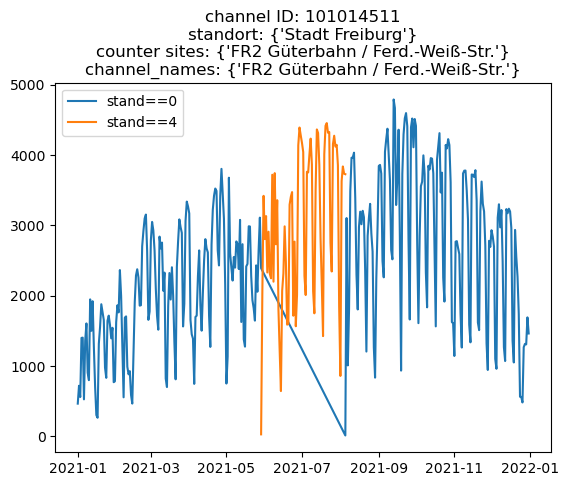

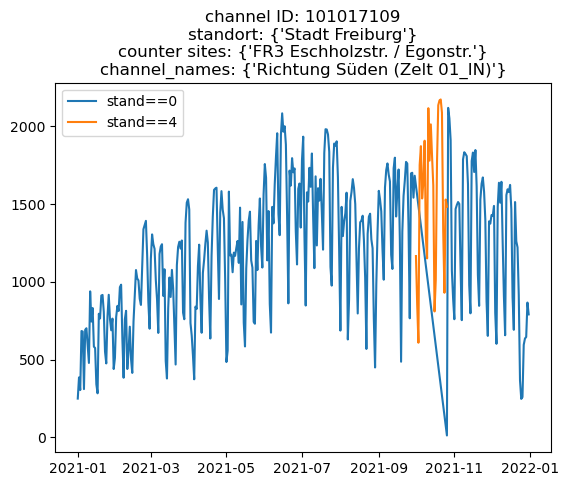

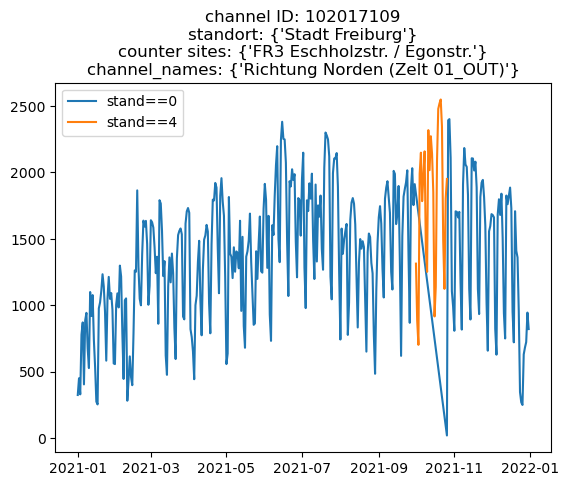

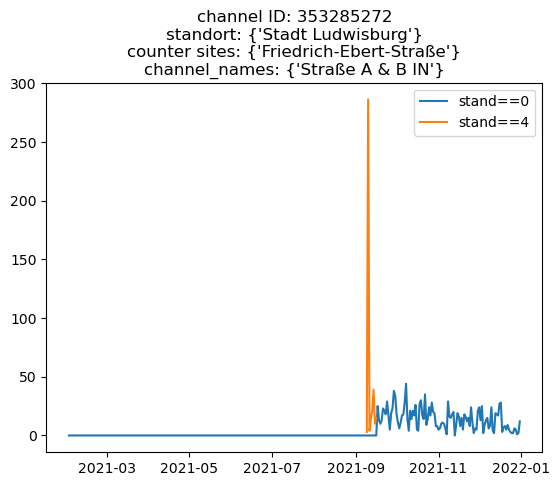

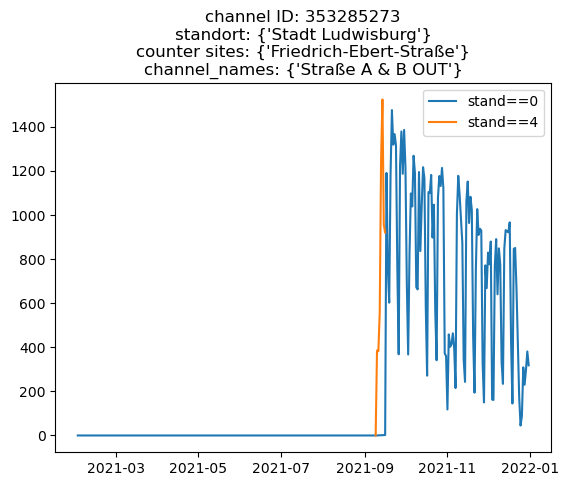

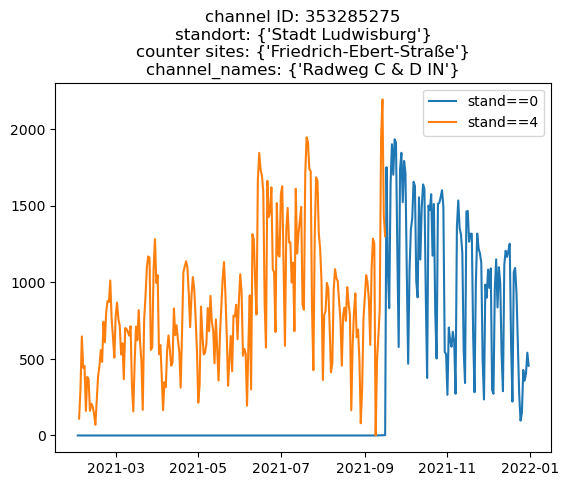

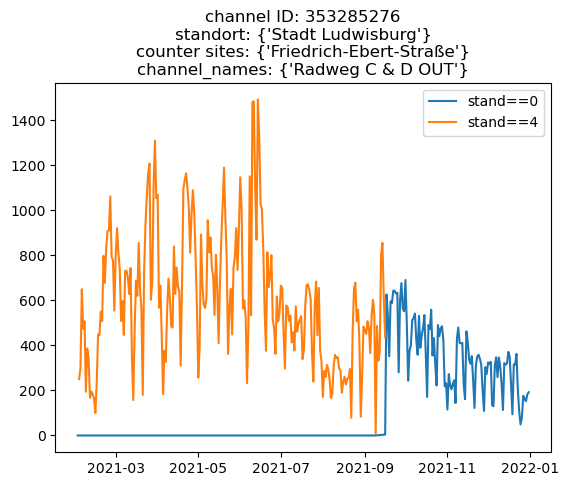

In [29]:
# visualize what 'stand' indicates

# sum counts of one day at one counting station, seperated by stand
counters_by_daytype_daily_with_stand = dat.groupby(by=['standort', 'counter_site', 'channel_name', 'channel_id', 'stand', 'longitude', 'latitude', 'date'], as_index=False)['zählstand'].sum()

# for each channel ID for which we observe both stand==0 AND stand==4
for id4 in cid_stand0and4:

    # extract data of this channel
    dat_for_id = counters_by_daytype_daily_with_stand[counters_by_daytype_daily_with_stand['channel_id'] == id4]
    
    # plot daily bike rider counts collected by this channel,
    # seperate between different 'stand'-values

    # initialize figure
    plt.figure()
    
    # for each value of 'stand', plot daily number of bike rider counts
    for stand in [0, 4]:
        plt.plot(
            dat_for_id[dat_for_id['stand'] == stand]['date'],
            dat_for_id[dat_for_id['stand'] == stand]['zählstand'],
            label='stand=='+str(stand))
    
    # add title and legend
    plt.title('channel ID: ' + str(id4) + '\nstandort: ' + str(set(dat_for_id['standort'])) + '\ncounter sites: ' + str(set(dat_for_id['counter_site'])) + '\nchannel_names: ' + str(set(dat_for_id['channel_name'])))
    plt.legend()

Apparently, "stand" differentiates different time periods. So, for our analysis goal, we can ignore this factor.

#### 'interval'

The 'interval' column takes the same value for all measurements. So, for our analysis goal, we can ignore this factor.

#### 'domain_name' and 'domain_id'

The 'domain_name' and 'domain_id' columns takes the same value for all measurements. So, for our analysis goal, we can ignore this factor.

## Summary

One row represents one hourly bike rider count measurement.  
Each column represents an attribute of a measurement:
| column name | description |
| --- | --- |
|timestamp | point in time when the measurement was collected |
|iso_timestamp | point in time when the measurement was collected; iso-formatted |
|timezone | time zone of the points in time that are given in the timestamp-column |
|standort | name of the city in which the measurement was collected |
|counter_site | description (in words) where the measurement was collected, e.g., name of a street |
|counter_site_id | ID of counter_site; equally informative as counter_site |
|counter_serial | serial number (?) of counter_site; equally informative as counter_site |
|longitude | coordinate of counter site; together with latitude: equally informative as counter_site |
|latitude | coordinate of counter site; together with longitude: equally informative as counter_site |
|channel_name | specification (in words) how measurements are collected at a counter site; e.g. direction of travel |
|channel_id | ID of channel. At one counter site, different count series are measured in parallel, e.g., in different directions of travel (but also in parallel for the same direction of travel). channel_id discriminates between different count series, collected at one counter site. It is more specific than channel_name, i.e., channel_id helps to discriminate between different counts in the same direction of travel while channel_name might only specify the direction of travel. |
|zählstand | hourly sum of bike riders |
|stand | differentiates between different time periods for a count series at one channel ID (for most datapoints, it takes value 0) |
|domain_name | name of the organization that published the data online (takes value 'NVBW - Nahverkehrsgesellschaft Baden- Württemberg' for all datapoints) |
|domain_id | ID of the organization that published the data online (takes value 6598 for all datapoints) |
|interval | ? (takes value 15 for all datapoints) |

In [30]:
# overview over the data (listed here again for illustration)
# list how many distinct values are contained in each column and show example
# values for each column
overview_df

,colname,number_of_unique_values_in_column,example_values
0,timestamp,8748,"[2021-07-06T01:00:00+0000, 2021-05-27T04:00:00..."
1,iso_timestamp,8748,"[2021-07-16T00:00:00+0200, 2021-09-04T15:00:00..."
2,zählstand,696,"[311, 360, 359, 506]"
3,stand,2,"[4, 0]"
4,standort,6,"[Stadt Konstanz, Stadt Ludwisburg, Stadt Offen..."
5,channel_name,73,"[Blautal Lupferbrücke Ri. Süden, Zugwiesen Sta..."
6,channel_id,101,"[353262797, 353221311, 353221137, 353221150]"
7,counter_site,25,"[S-Bahn Haltestelle Fürstenberg, Hauptstraße n..."
8,counter_site_id,25,"[300015458, 100017109, 300015618, 300014866]"
9,domain_name,1,[NVBW - Nahverkehrsgesellschaft Baden- Württem...


Given are hourly bike rider counts, collected 24 times a day.
There are days on which some 'hourly' measurements are missing.
Not every counting station collected data for the whole year 2021. (TODO prüfen)

The information about the location of a counting station is nested:  
There are different 'standort' (cities).  
Within each of 'standort' (city), there are different 'counter_site' (e.g., different streets).  
And at each 'counter_site', different count series (so-called "channels") are measured in parallel, e.g., in different directions of travel. 'channel_name' / 'channel_id' discriminates between these different channels. The 'channel_name' provides a distinction between channels that is more coarse than the distinction made by 'channel_id'; i.e., 'channel_id' is nested within 'channel_name'. So, at each 'channel_name', there can be multiple 'channel_id'.

Example:

In 'Stadt Freiburg' ('standort'), there are 3 'counter_sites' ('FR1 Dreisam / Otto-Wels-Str.', 'FR2 Güterbahn / Ferd.-Weiß-Str.', and 'FR3 Eschholzstr. / Egonstr.'). At each of them, there are different 'channel_name'. (In Freiburg, there is a 1-to-1-mapping between 'channel_name' and 'channel_id'. So here, for every 'channel_name', there is exactly one 'channel_id'.)

Example to illustrate channel IDs:

In Ludwigsburg, there is a counter site called "Fuchshof". At this counter site, we have two channel names ('Fuchshof stadteinwärts' und 'Fuchshof stadtauswärts').
For each of the two channel names, there are two channel IDs ('Fuchshof stadteinwärts': 353245992 and 353245994; 'Fuchshof stadtauswärts': 353245993 and 353245995) which collect hourly data.
So: Once every hour at the counter site 'Fuchshof', two values are collected for bike riders going downtown, and two values are collected for bike riders going out of town.

Peculiarities to keep in mind for data processing and data cleaning:  
- Dates of measurements collected at midnight need to be adjusted (such that bike riders that passed the counting station in the last hour of a day are still added to the count for this day and not to the next)
- There is one exception of the location nesting: In Ludwigsburg (counter_site: Schlieffenstraße), there are channel IDs which map to different channel names. This is due to a renaming of these channels in the middle of the year.
- 'Ludwigsburg' is misspelled in the raw dataset.

TODO Vielleicht noch Übersicht, wie viele Datenpunkte, wie viele counter sites...